1\. **Reductions**

Given the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

   1. find the total mean
   2. find the mean for each row and column

In [2]:
import numpy as np

In [3]:
m = np.arange(12).reshape((3,4))
print(m)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


1. Total mean is calculated using a built in function in numpy.

In [5]:
tot_mean = np.mean(m)
print(tot_mean)

5.5


2. The mean for each row and column is calculated 

In [6]:
row_mean = np.mean(m, axis = 1)
print(row_mean)

[1.5 5.5 9.5]


In [7]:
col_mean = np.mean(m, axis=0)
print(col_mean)

[4. 5. 6. 7.]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [8]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])

1. Using outer in numpy

In [9]:
out_np = np.outer(u,v)
print(out_np)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


2. Using for-loop to calcualate outer product

In [10]:
for_outer = np.zeros((4,4))
for i in range(len(u)):
    for j in range(len(v)):
        for_outer[i,j] = u[i]*v[j]
print(for_outer)

[[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]]


3. Using numpy broadcasting operations

In [11]:
w = u.copy()
w = w[:, np.newaxis]
broad_outer = w * v
print(broad_outer)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a $10 \times 6$ matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [12]:
import numpy.random as npr
import numpy.ma as ma

Creating a 10x6 matrix with float values between 0 and 3 

In [14]:
ran_mat = npr.uniform(0,3, size = (10,6))
print(ran_mat)

[[1.87759805 0.3521782  0.01436698 2.71799409 1.72692332 2.88031872]
 [1.86233269 1.28541625 1.10850793 2.69037907 1.31342874 0.03070221]
 [0.65137049 0.97554386 0.26144615 0.73670738 0.2393141  1.40304692]
 [2.27329681 0.99549447 0.24697388 1.77463014 0.81171702 2.51195902]
 [1.93185053 2.28732039 2.8441215  0.59414702 0.729116   0.8393471 ]
 [0.763416   0.34671313 1.33188086 1.41915241 2.66827771 1.33067078]
 [1.75581666 1.25221989 0.19660241 0.42932098 0.37420514 2.28336843]
 [0.68896289 2.35384217 1.97840995 0.7607465  2.58105457 2.52349709]
 [2.80792583 0.83292408 0.03300511 0.91432546 2.16982019 2.65482962]
 [2.99543411 0.47318839 0.69586085 1.23354558 1.86259668 2.70350094]]


Creating a mask to enter zeros where the entries are less than 0.3

In [15]:
mask_ran_mat = ran_mat.copy()
mask_ran_mat[mask_ran_mat < 0.3] = 0
print(mask_ran_mat)

[[1.87759805 0.3521782  0.         2.71799409 1.72692332 2.88031872]
 [1.86233269 1.28541625 1.10850793 2.69037907 1.31342874 0.        ]
 [0.65137049 0.97554386 0.         0.73670738 0.         1.40304692]
 [2.27329681 0.99549447 0.         1.77463014 0.81171702 2.51195902]
 [1.93185053 2.28732039 2.8441215  0.59414702 0.729116   0.8393471 ]
 [0.763416   0.34671313 1.33188086 1.41915241 2.66827771 1.33067078]
 [1.75581666 1.25221989 0.         0.42932098 0.37420514 2.28336843]
 [0.68896289 2.35384217 1.97840995 0.7607465  2.58105457 2.52349709]
 [2.80792583 0.83292408 0.         0.91432546 2.16982019 2.65482962]
 [2.99543411 0.47318839 0.69586085 1.23354558 1.86259668 2.70350094]]


4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the `sin` and `cos` functions and indicate graphically (with a line or a marker) where they are close

In [16]:
from math import pi
a = np.linspace(0,2*pi, num=100, endpoint=True)
print(a)

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

In [17]:
#slice
b = a[0::10]
print(b)

[0.         0.63466518 1.26933037 1.90399555 2.53866073 3.17332591
 3.8079911  4.44265628 5.07732146 5.71198664]


In [18]:
#reverse 
c = a[::-1]
print(c)

[6.28318531 6.21971879 6.15625227 6.09278575 6.02931923 5.96585272
 5.9023862  5.83891968 5.77545316 5.71198664 5.64852012 5.58505361
 5.52158709 5.45812057 5.39465405 5.33118753 5.26772102 5.2042545
 5.14078798 5.07732146 5.01385494 4.95038842 4.88692191 4.82345539
 4.75998887 4.69652235 4.63305583 4.56958931 4.5061228  4.44265628
 4.37918976 4.31572324 4.25225672 4.1887902  4.12532369 4.06185717
 3.99839065 3.93492413 3.87145761 3.8079911  3.74452458 3.68105806
 3.61759154 3.55412502 3.4906585  3.42719199 3.36372547 3.30025895
 3.23679243 3.17332591 3.10985939 3.04639288 2.98292636 2.91945984
 2.85599332 2.7925268  2.72906028 2.66559377 2.60212725 2.53866073
 2.47519421 2.41172769 2.34826118 2.28479466 2.22132814 2.15786162
 2.0943951  2.03092858 1.96746207 1.90399555 1.84052903 1.77706251
 1.71359599 1.65012947 1.58666296 1.52319644 1.45972992 1.3962634
 1.33279688 1.26933037 1.20586385 1.14239733 1.07893081 1.01546429
 0.95199777 0.88853126 0.82506474 0.76159822 0.6981317  0.634665

In [19]:
#extract values
from math import sin, cos
abs_dif = []
abs_dif = [a[x] for x in range(len(a)) if abs(sin(a[x])-cos(a[x]))<0.1]
print(abs_dif)

[0.7615982190520711, 0.8250647373064104, 3.8714576135146945, 3.934924131769034]


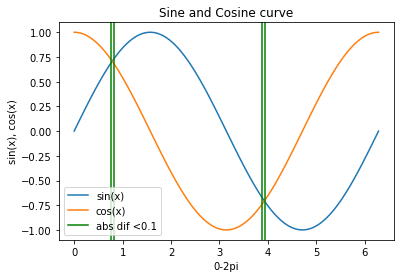

In [20]:
import matplotlib.pyplot as plt
from math import sin, cos
%matplotlib inline 

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0,2*pi, num=100, endpoint=True)
plt.plot(x, np.sin(x), label='sin(x)');
plt.plot(x, np.cos(x), label='cos(x)');
plt.title("Sine and Cosine curve")
plt.xlabel("0-2pi")
plt.ylabel("sin(x), cos(x)");

plt.axvline(abs_dif[0], color='g', label='abs dif <0.1');
plt.axvline(abs_dif[1], color='g');
plt.axvline(abs_dif[2], color='g');
plt.axvline(abs_dif[3], color='g');


plt.legend();


5\. **Matrices**

Create a matrix that shows the $10 \times 10$ multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [21]:
mul_table = np.zeros((10, 10))

for i in range(10):
    for j in range(10):
        mul_table[i, j] = (i+1) * (j+1)
        
print(mul_table)


[[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  8.  16.  24.  32.  40.  48.  56.  64.  72.  80.]
 [  9.  18.  27.  36.  45.  54.  63.  72.  81.  90.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]]


In [22]:
#trace of the matrix
sum = 0
for i in range(10):
    sum += mul_table[i,i]
print(sum)

385.0


In [23]:
#anti-diagonal matrix
anti_dig = []
for i in range(10):
    if i == 0:
        anti_dig.append(mul_table[i,-1])
    else:
        anti_dig.append(mul_table[i,-(i+1)])
print(anti_dig)

[10.0, 18.0, 24.0, 28.0, 30.0, 30.0, 28.0, 24.0, 18.0, 10.0]


In [24]:
#diagonal offset by 1 upwards
dig_off = []

for i in range(10):
    if i == 9:
        break
    else: 
        dig_off.append(mul_table[i, i+1])

print(dig_off)

[2.0, 6.0, 12.0, 20.0, 30.0, 42.0, 56.0, 72.0, 90.0]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: `0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448`

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [4]:
cities = ['Chicago', 'Springfield', 'Saint-Louis', 'Tulsa', 'Oklahoma City', 
          'Amarillo', 'Santa Fe', 'Alberquerque', 'Flagstaff', 'Los Angeles']
pos_mil = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

dist_between = abs(pos_mil - pos_mil[:, np.newaxis]) * 1.609344
print(dist_between)


[[   0.        318.650112  487.631232 1184.477184 1401.738624 1890.9792
  2373.7824   2484.827136 3078.675072 3939.674112]
 [ 318.650112    0.        168.98112   865.827072 1083.088512 1572.329088
  2055.132288 2166.177024 2760.02496  3621.024   ]
 [ 487.631232  168.98112     0.        696.845952  914.107392 1403.347968
  1886.151168 1997.195904 2591.04384  3452.04288 ]
 [1184.477184  865.827072  696.845952    0.        217.26144   706.502016
  1189.305216 1300.349952 1894.197888 2755.196928]
 [1401.738624 1083.088512  914.107392  217.26144     0.        489.240576
   972.043776 1083.088512 1676.936448 2537.935488]
 [1890.9792   1572.329088 1403.347968  706.502016  489.240576    0.
   482.8032    593.847936 1187.695872 2048.694912]
 [2373.7824   2055.132288 1886.151168 1189.305216  972.043776  482.8032
     0.        111.044736  704.892672 1565.891712]
 [2484.827136 2166.177024 1997.195904 1300.349952 1083.088512  593.847936
   111.044736    0.        593.847936 1454.846976]
 [3078.675

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Construct a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [26]:
prime_num = [1]
num = 99
for i in range(2,num):
    for j in range(2,num):
        if i % j == 0:
            break
    if i == j:
        prime_num.append(i)
print(prime_num)

[1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [27]:
import timeit

def prime_num(N):
    mask = np.ones(N+1, dtype=bool)
    

    for i in range(2, int(N**0.5) + 1):
        if mask[i]:
            mask[i*i : N+1 : i] = False


    prime_num = np.nonzero(mask)[0][2:]

    return prime_num




print("Prime numbers in the range 0-99:", prime_num(99))
time_taken2 = timeit.timeit(lambda: prime_num(11), number=10000)
print("Time taken for N=11:", time_taken2, "seconds")
time_taken = timeit.timeit(lambda: prime_num(99), number=10000)
print("Time taken for N=99:", time_taken, "seconds")
time_taken3 = timeit.timeit(lambda: prime_num(1000), number=10000)
print("Time taken for N=1000:", time_taken3, "seconds")
time_taken4 = timeit.timeit(lambda: prime_num(10000), number=10000)
print("Time taken for N=10000:", time_taken4, "seconds")

print("After running the code several times, the generel tendency is that the performance (timeit) takes longer as the number N increases. When the N is set closer to eachother,  the time will vary greatly, so that sometimes the smaller N takes longer time.")


Prime numbers in the range 0-99: [ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
Time taken for N=11: 0.13195035299986557 seconds
Time taken for N=99: 0.09369617399988783 seconds
Time taken for N=1000: 0.18229020999979184 seconds
Time taken for N=10000: 0.5130921170002694 seconds
After running the code several times, the generel tendency is that the performance (timeit) takes longer as the number N increases. When the N is set closer to eachother,  the time will vary greatly, so that sometimes the smaller N takes longer time.


In [ ]:
def sieve_era(N):
    

8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

In [28]:
np.random.seed(42)

walk_step = np.random.randint(0,2, size = (1000,200))
walk_step[walk_step <= 0] = -1
#print(walk_step[:10,:10])

In [29]:
dist = np.cumsum(walk_step, axis=1)
sq_dist = dist**2
mean_sq_dist = np.mean(sq_dist, axis=0)

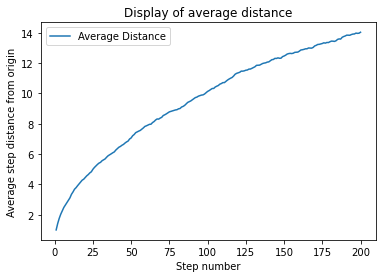

In [30]:
steps = np.arange(1, 201)
plt.plot(steps, np.sqrt(mean_sq_dist), label='Average Distance')
plt.xlabel('Step number')
plt.ylabel('Average step distance from origin')
plt.title('Display of average distance')
plt.legend()
plt.show()